In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/jiawenli/Desktop/MBAN_6110T/Class_1/messy_data.csv')

In [4]:
df.head()

,Age,Income,Gender,Product,Quantity
0,56,59544.57663,Female,D,3
1,46,36399.18997,Female,NaN,1
2,32,57140.63881,Female,D,2
3,60,69554.91903,Male,C,5
4,25,53173.80518,Female,D,2


In [5]:
#write a average income by gender
df.groupby('Gender')['Income'].mean()

Gender
Female    49644.486259
Male      57219.421148
Name: Income, dtype: float64

In [6]:
#calculate average income by product
df.groupby('Product')['Income'].mean()

Product
A    51745.423588
B    61486.730790
C    50857.602438
D    49876.379810
Name: Income, dtype: float64

In [12]:
#how many customer purchases for each product
df.groupby('Product')['Age'].count()

Product
A    23
B    25
C    24
D    28
Name: Age, dtype: int64

In [13]:
df['Product'].value_counts()

D    28
B    25
C    24
A    23
Name: Product, dtype: int64

In [19]:
#find the min, max, mean and median of the income column
df.describe(include='all')

,Age,Income,Gender,Product,Quantity
count,105.000000,94.000000,105,100,105.00000
unique,NaN,NaN,2,4,NaN
top,NaN,NaN,Female,D,NaN
freq,NaN,NaN,58,28,NaN
mean,42.076190,52867.862808,NaN,NaN,3.20000
std,15.940813,29896.579420,NaN,NaN,1.44382
min,18.000000,20901.331720,NaN,NaN,1.00000
25%,31.000000,37814.315255,NaN,NaN,2.00000
50%,41.000000,48760.369705,NaN,NaN,3.00000
75%,55.000000,61644.277868,NaN,NaN,5.00000


In [18]:
#find descriptive statistics for income by gender
df.groupby('Gender')['Income'].aggregate(['min','max','mean','median'])

,min,max,mean,median
Gender,,,,
Female,27763.63630,94154.95125,49644.486259,47443.734975
Male,20901.33172,300000.00000,57219.421148,52807.321410


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: xlabel='Income', ylabel='Count'>

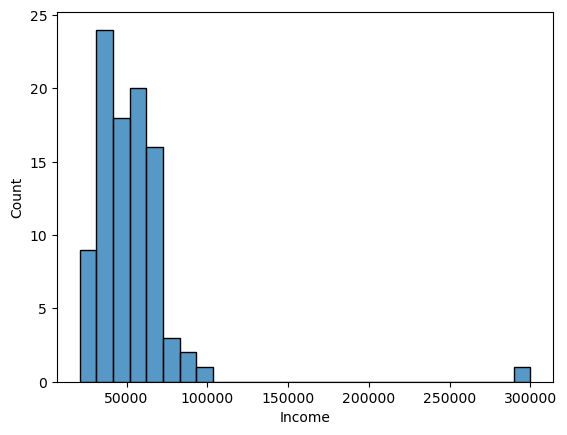

In [27]:
sns.histplot(df['Income']) #plot distribution of income

In [30]:
df[df['Income']>250000]

,Age,Income,Gender,Product,Quantity
99,61,300000.0,Male,B,4


In [40]:
df_noout = df.set_index('Income').drop(300000)
df_noout

,Age,Gender,Product,Quantity
Income,,,,
59544.57663,56,Female,D,3
36399.18997,46,Female,NaN,1
57140.63881,32,Female,D,2
69554.91903,60,Male,C,5
53173.80518,25,Female,D,2
...,...,...,...,...
37341.55459,61,Male,D,5
35516.63492,55,Female,A,3
53254.05089,31,Male,B,2


<Axes: xlabel='Income', ylabel='Count'>

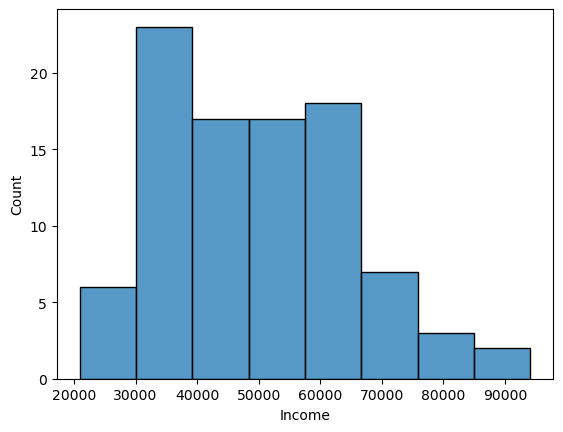

In [38]:
sns.histplot(df_noout.reset_index()['Income'])

<Axes: xlabel='Age', ylabel='Income'>

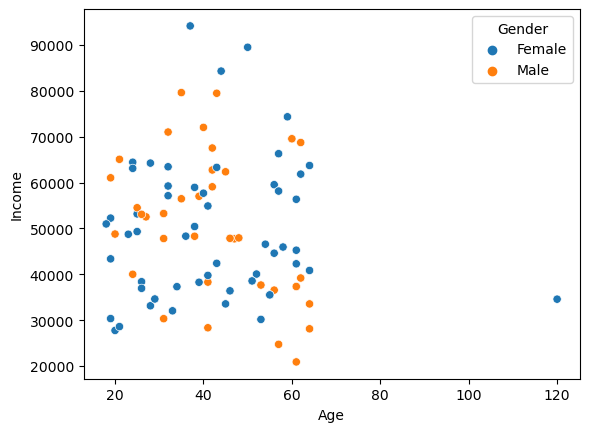

In [39]:
sns.scatterplot(x='Age',y='Income',data = df_noout, hue='Gender')

<Axes: >

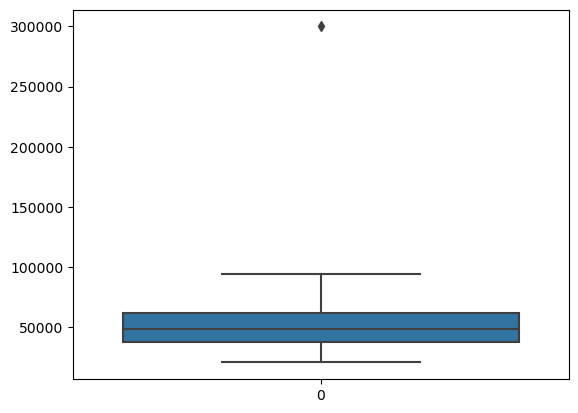

In [41]:
sns.boxplot(df['Income'])

<Axes: xlabel='Gender', ylabel='Income'>

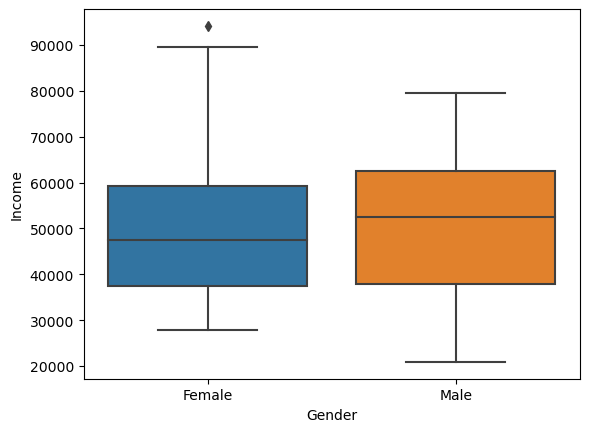

In [43]:
sns.boxplot(data=df_noout.reset_index(), x='Gender',y='Income')

<Axes: xlabel='Product', ylabel='Income'>

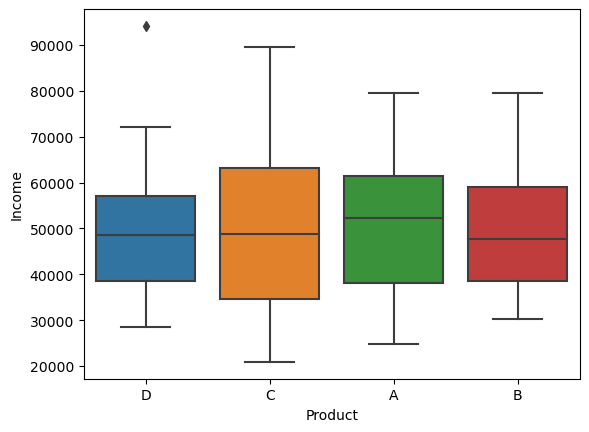

In [48]:
sns.boxplot(data=df_noout.reset_index(), x='Product',y='Income')

In [57]:
# reset the index permanently
df_noout.reset_index(inplace=True)


In [58]:
# removing duplicates
df_noout.drop_duplicates()

,index,Income,Age,Gender,Product,Quantity
0,0,59544.57663,56,Female,D,3
1,1,36399.18997,46,Female,NaN,1
2,2,57140.63881,32,Female,D,2
3,3,69554.91903,60,Male,C,5
4,4,53173.80518,25,Female,D,2
...,...,...,...,...,...,...
99,99,37341.55459,61,Male,D,5
100,100,35516.63492,55,Female,A,3
101,101,53254.05089,31,Male,B,2
102,102,NaN,21,Male,B,2


In [59]:
#filling the missing data
df_noout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     104 non-null    int64  
 1   Income    93 non-null     float64
 2   Age       104 non-null    int64  
 3   Gender    104 non-null    object 
 4   Product   99 non-null     object 
 5   Quantity  104 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.0+ KB


In [60]:
df_noout.groupby('Gender')['Income'].median()

Gender
Female    47443.734975
Male      52529.890810
Name: Income, dtype: float64

In [61]:
male_clean = df_noout[df_noout['Gender']=='Male'].fillna(52529.890810)

In [62]:
female_clean = df_noout[df_noout['Gender']=='Female'].fillna(47443.734975)

In [63]:
df_clean = pd.concat([male_clean, female_clean], axis=0)

In [64]:
df_clean

,index,Income,Age,Gender,Product,Quantity
3,3,69554.91903,60,Male,C,5
6,6,36554.97225,56,Male,D,1
8,8,72034.11928,40,Male,D,2
12,12,52529.89081,53,Male,B,1
13,13,24735.68932,57,Male,A,5
...,...,...,...,...,...,...
91,91,59255.05664,32,Female,C,3
93,93,50984.73737,18,Female,D,1
95,95,63099.75454,24,Female,B,5
98,98,34584.33704,120,Female,C,5


In [65]:
df_noout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     104 non-null    int64  
 1   Income    93 non-null     float64
 2   Age       104 non-null    int64  
 3   Gender    104 non-null    object 
 4   Product   99 non-null     object 
 5   Quantity  104 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.0+ KB


In [66]:
df_noout['Product'] = df_noout['Product'].fillna('Unknown')